<a href="https://colab.research.google.com/github/cmaguire001/instacart-feature-flag-analysis/blob/main/Instacart_Feature_Flag_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

orders = pd.read_csv('/content/orders.csv')
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1.0,prior,1.0,2.0,8.0,NaN
1,2398795,1.0,prior,2.0,3.0,7.0,15.0
2,473747,1.0,prior,3.0,3.0,12.0,21.0
3,2254736,1.0,prior,4.0,4.0,7.0,29.0
4,431534,1.0,prior,5.0,4.0,15.0,28.0


In [7]:
orders.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774033 entries, 0 to 774032
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                774033 non-null  int64  
 1   user_id                 774032 non-null  float64
 2   eval_set                774032 non-null  object 
 3   order_number            774032 non-null  float64
 4   order_dow               774032 non-null  float64
 5   order_hour_of_day       774032 non-null  float64
 6   days_since_prior_order  727525 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 41.3+ MB


In [8]:
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1.0,prior,1.0,2.0,8.0,NaN
1,2398795,1.0,prior,2.0,3.0,7.0,15.0
2,473747,1.0,prior,3.0,3.0,12.0,21.0
3,2254736,1.0,prior,4.0,4.0,7.0,29.0
4,431534,1.0,prior,5.0,4.0,15.0,28.0
5,3367565,1.0,prior,6.0,2.0,7.0,19.0
6,550135,1.0,prior,7.0,1.0,9.0,20.0
7,3108588,1.0,prior,8.0,1.0,14.0,14.0
8,2295261,1.0,prior,9.0,1.0,16.0,0.0
9,2550362,1.0,prior,10.0,4.0,8.0,30.0


In [9]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774033 entries, 0 to 774032
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                774033 non-null  int64  
 1   user_id                 774032 non-null  float64
 2   eval_set                774032 non-null  object 
 3   order_number            774032 non-null  float64
 4   order_dow               774032 non-null  float64
 5   order_hour_of_day       774032 non-null  float64
 6   days_since_prior_order  727525 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 41.3+ MB


In [10]:
# Count how many orders happen on each day of the week
orders_by_day = orders['order_dow'].value_counts().sort_index()

# Map numbers to weekdays for clarity
weekdays = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
            4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

orders_by_day.index = orders_by_day.index.map(weekdays)

print(orders_by_day)



order_dow
Sunday       135883
Monday       132594
Tuesday      105607
Wednesday     98977
Thursday      96401
Friday       102740
Saturday     101830
Name: count, dtype: int64


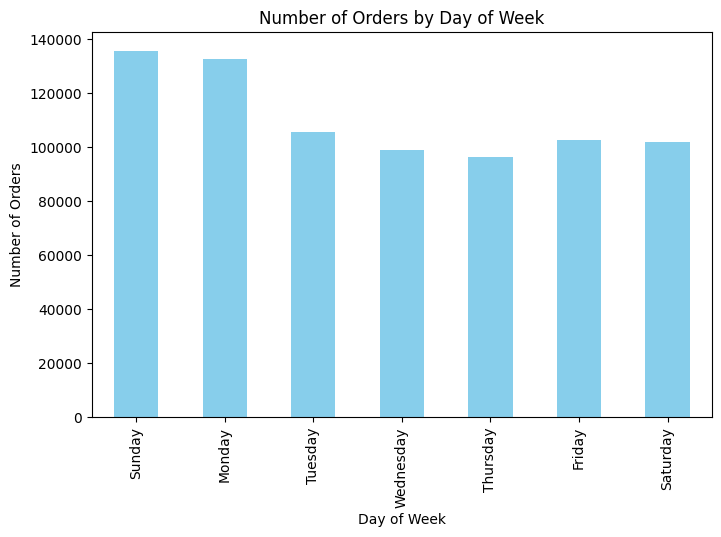

In [11]:
import matplotlib.pyplot as plt

orders_by_day.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Number of Orders by Day of Week')
plt.ylabel('Number of Orders')
plt.xlabel('Day of Week')
plt.show()


In [12]:
# Count orders by hour
orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Print the result
print(orders_by_hour)


order_hour_of_day
0.0      4998
1.0      2706
2.0      1680
3.0      1221
4.0      1292
5.0      2140
6.0      6926
7.0     21020
8.0     40750
9.0     58190
10.0    64955
11.0    64202
12.0    62109
13.0    63274
14.0    64044
15.0    64101
16.0    61602
17.0    51709
18.0    41346
19.0    31824
20.0    23419
21.0    17703
22.0    13889
23.0     8932
Name: count, dtype: int64


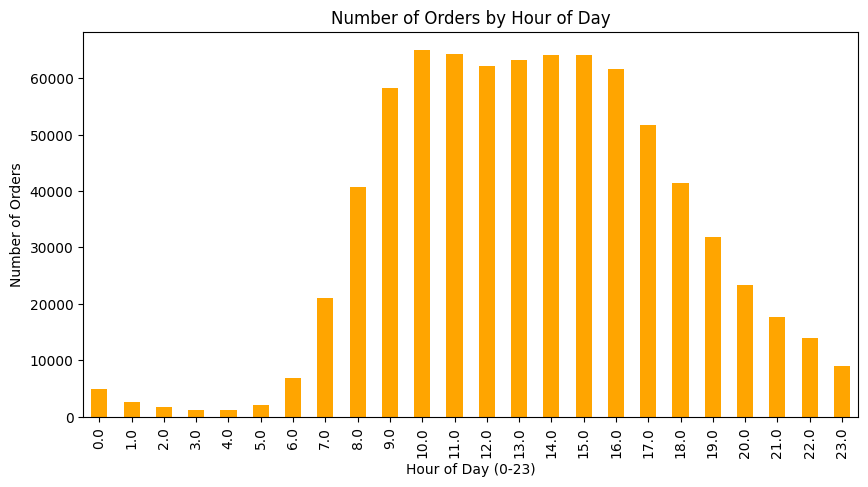

In [13]:
orders_by_hour.plot(kind='bar', color='orange', figsize=(10,5))
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Orders')
plt.show()


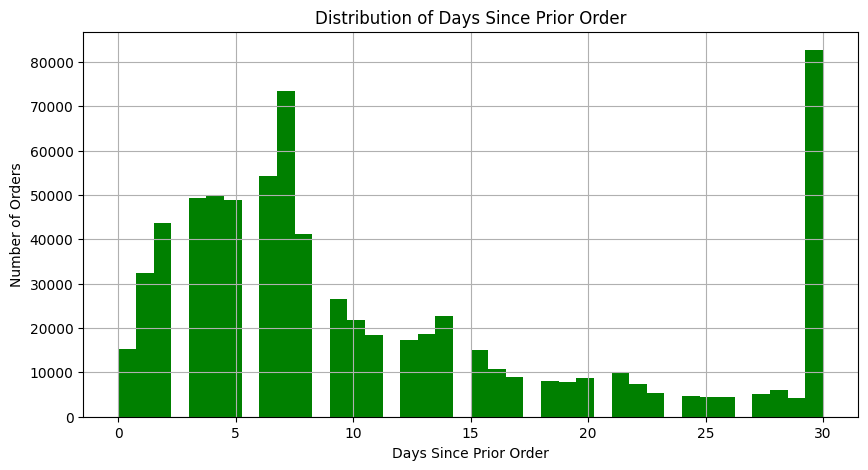

In [14]:
# Check distribution of days since prior order
import matplotlib.pyplot as plt

orders['days_since_prior_order'].hist(bins=40, color='green', figsize=(10,5))
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.show()


In [15]:
import numpy as np

# Get all unique users
users = orders['user_id'].unique()

# Randomly assign each user to control or treatment
np.random.seed(42)  # for reproducibility
user_flags = pd.DataFrame({
    'user_id': users,
    'feature_flag': np.random.choice(['control', 'treatment'], size=len(users))
})

user_flags.head()


,user_id,feature_flag
0,1.0,control
1,2.0,treatment
2,3.0,control
3,4.0,control
4,5.0,control


In [16]:
# Merge the feature flag assignment into the orders table
orders_flagged = orders.merge(user_flags, on='user_id', how='left')

orders_flagged.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,feature_flag
0,2539329,1.0,prior,1.0,2.0,8.0,NaN,control
1,2398795,1.0,prior,2.0,3.0,7.0,15.0,control
2,473747,1.0,prior,3.0,3.0,12.0,21.0,control
3,2254736,1.0,prior,4.0,4.0,7.0,29.0,control
4,431534,1.0,prior,5.0,4.0,15.0,28.0,control


In [17]:
# Calculate average days_since_prior_order for control vs treatment
avg_days = orders_flagged.groupby('feature_flag')['days_since_prior_order'].mean()
print(avg_days)


feature_flag
control      11.044463
treatment    11.137856
Name: days_since_prior_order, dtype: float64


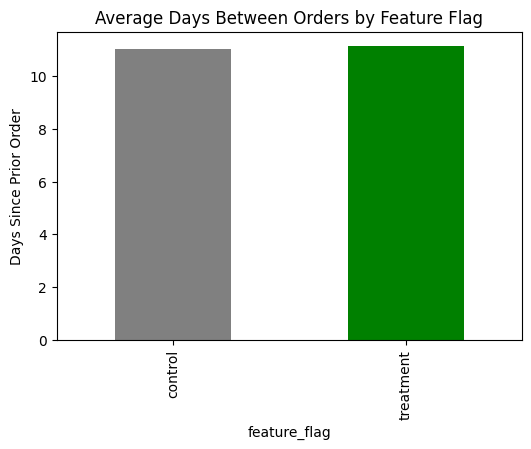

In [18]:
avg_days.plot(kind='bar', color=['gray','green'], figsize=(6,4))
plt.title('Average Days Between Orders by Feature Flag')
plt.ylabel('Days Since Prior Order')
plt.show()


In [19]:
# Group by feature flag
summary = orders_flagged.groupby('feature_flag').agg(
    total_orders=('order_id', 'count'),
    avg_days_between_orders=('days_since_prior_order', 'mean'),
    median_days_between_orders=('days_since_prior_order', 'median'),
    unique_users=('user_id', 'nunique')
).reset_index()

print(summary)


  feature_flag  total_orders  avg_days_between_orders  \
0      control        388674                11.044463   
1    treatment        385359                11.137856   

   median_days_between_orders  unique_users  
0                         7.0         23272  
1                         7.0         23235  


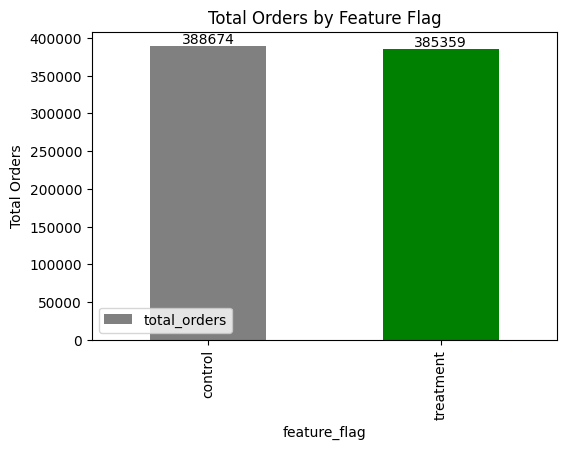

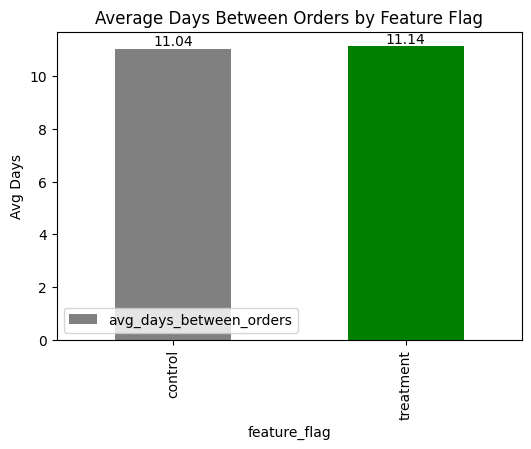

In [20]:
import matplotlib.pyplot as plt

# Bar plot for total orders
ax1 = summary.plot(x='feature_flag', y='total_orders', kind='bar', color=['gray','green'], figsize=(6,4))
plt.title('Total Orders by Feature Flag')
plt.ylabel('Total Orders')

# Add data labels to the first plot
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f')

plt.show()

# Bar plot for average days between orders
ax2 = summary.plot(x='feature_flag', y='avg_days_between_orders', kind='bar', color=['gray','green'], figsize=(6,4))
plt.title('Average Days Between Orders by Feature Flag')
plt.ylabel('Avg Days')

# Add data labels to the second plot
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f')

plt.show()

In [21]:
# Busiest day of week
orders_by_day = orders['order_dow'].value_counts().sort_index()
weekdays = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
            4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
orders_by_day.index = orders_by_day.index.map(weekdays)

# Busiest hour of day
orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Reorder frequency
avg_days_between_orders = orders['days_since_prior_order'].mean()
median_days_between_orders = orders['days_since_prior_order'].median()

# Feature flag experiment summary (from previous step)
experiment_summary = summary.copy()


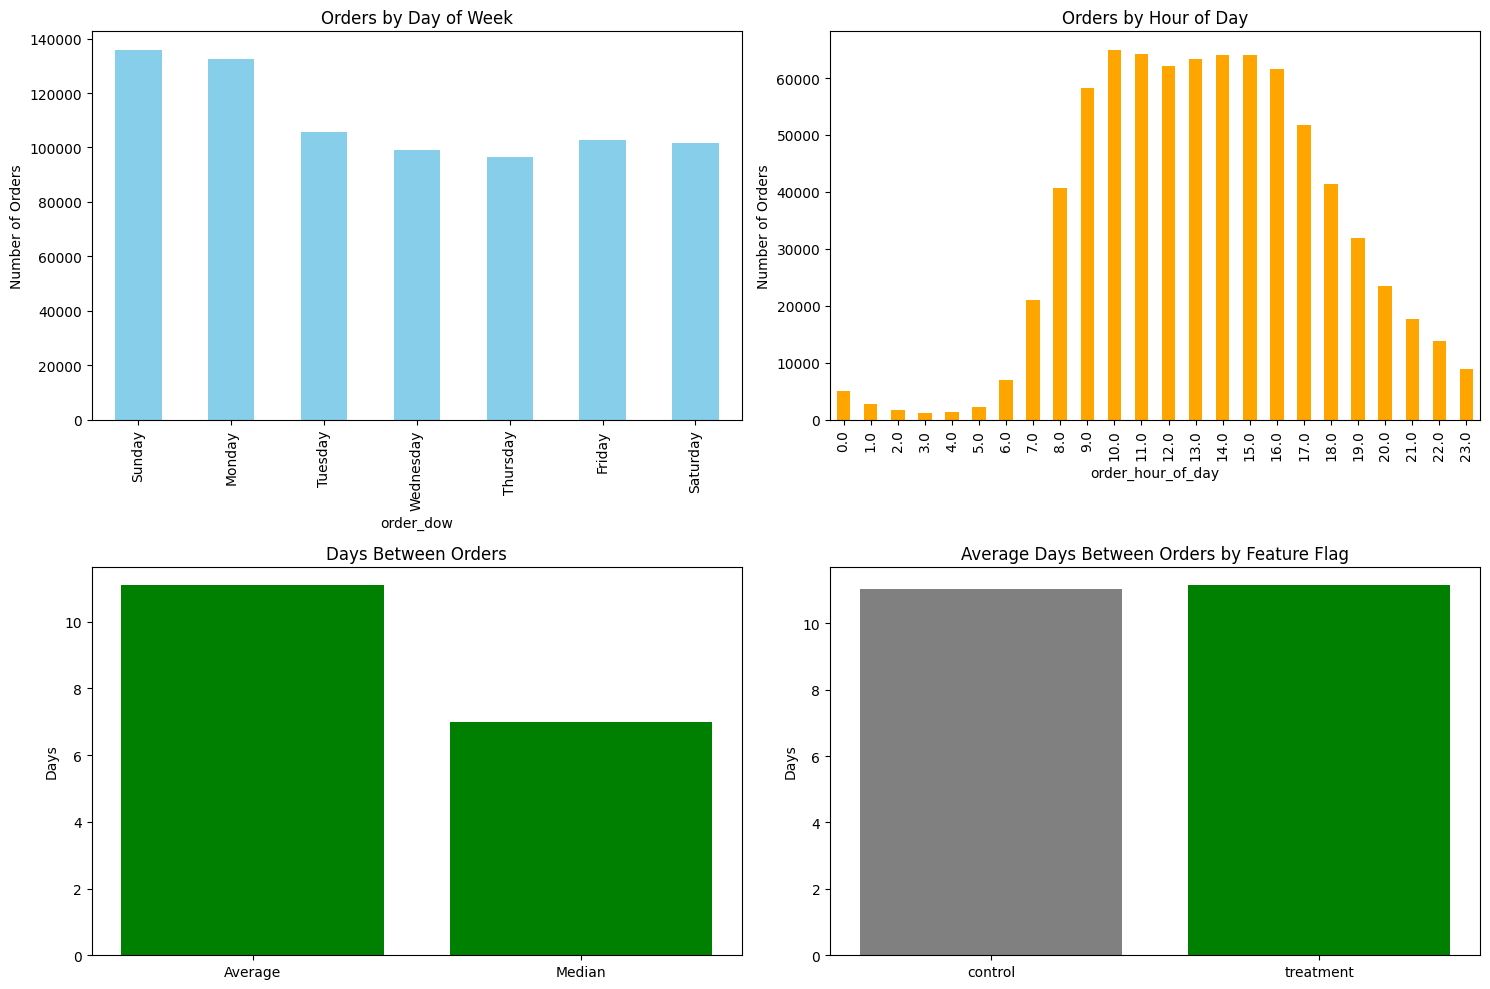

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# Busiest day
plt.subplot(2,2,1)
orders_by_day.plot(kind='bar', color='skyblue')
plt.title('Orders by Day of Week')
plt.ylabel('Number of Orders')

# Busiest hour
plt.subplot(2,2,2)
orders_by_hour.plot(kind='bar', color='orange')
plt.title('Orders by Hour of Day')
plt.ylabel('Number of Orders')

# Reorder frequency
plt.subplot(2,2,3)
plt.bar(['Average','Median'], [avg_days_between_orders, median_days_between_orders], color='green')
plt.title('Days Between Orders')
plt.ylabel('Days')

# Feature flag experiment
plt.subplot(2,2,4)
plt.bar(experiment_summary['feature_flag'], experiment_summary['avg_days_between_orders'], color=['gray','green'])
plt.title('Average Days Between Orders by Feature Flag')
plt.ylabel('Days')

plt.tight_layout()
plt.show()


In [23]:
!pip install duckdb



In [24]:
import duckdb

# Create a DuckDB in-memory database
con = duckdb.connect(database=':memory:')

# Load CSV into DuckDB
con.execute("""
CREATE TABLE orders AS
SELECT * FROM read_csv_auto('/content/orders.csv');
""")

# Check the first 5 rows
con.execute("SELECT * FROM orders LIMIT 5").df()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,08,NaN
1,2398795,1,prior,2,3,07,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,07,29.0
4,431534,1,prior,5,4,15,28.0


In [25]:
query_avg_reorder = """
SELECT AVG(days_since_prior_order) AS avg_days_between_orders
FROM orders
WHERE days_since_prior_order IS NOT NULL
"""
avg_reorder = con.execute(query_avg_reorder).df()
avg_reorder



,avg_days_between_orders
0,11.095927


In [26]:
query_avg_reorder = """
SELECT AVG(days_since_prior_order) AS avg_days_between_orders
FROM orders
WHERE days_since_prior_order IS NOT NULL
"""
avg_reorder = con.execute(query_avg_reorder).df()
avg_reorder


,avg_days_between_orders
0,11.095927


In [27]:
query_median_reorder = """
SELECT PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY days_since_prior_order) AS median_days_between_orders
FROM orders
WHERE days_since_prior_order IS NOT NULL
"""
median_reorder = con.execute(query_median_reorder).df()
median_reorder


,median_days_between_orders
0,7.0


In [28]:
import numpy as np
import pandas as pd

# Get unique users
users = con.execute("SELECT DISTINCT user_id FROM orders").df()

# Randomly assign each user to control or treatment
np.random.seed(42)
users['feature_flag'] = np.random.choice(['control', 'treatment'], size=len(users))

# Create a DuckDB table from this
con.register('user_flags', users)


In [29]:
con.execute("""
CREATE TABLE orders_flagged AS
SELECT o.*, u.feature_flag
FROM orders o
LEFT JOIN user_flags u
ON o.user_id = u.user_id
""")


In [30]:
query_flag = """
SELECT feature_flag,
       AVG(days_since_prior_order) AS avg_days_between_orders,
       PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY days_since_prior_order) AS median_days_between_orders,
       COUNT(*) AS total_orders,
       COUNT(DISTINCT user_id) AS unique_users
FROM orders_flagged
WHERE days_since_prior_order IS NOT NULL
GROUP BY feature_flag
"""
experiment_summary = con.execute(query_flag).df()
experiment_summary


,feature_flag,avg_days_between_orders,median_days_between_orders,total_orders,unique_users
0,control,11.159614,7.0,470065,30347
1,treatment,11.033192,7.0,477196,30213


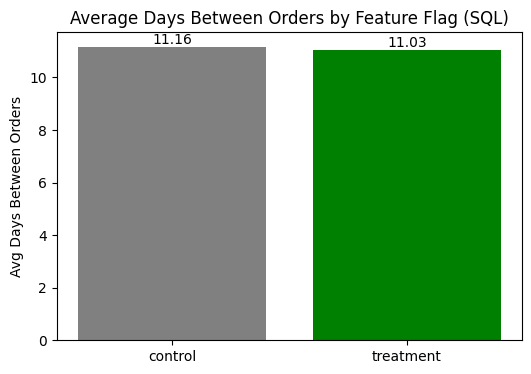

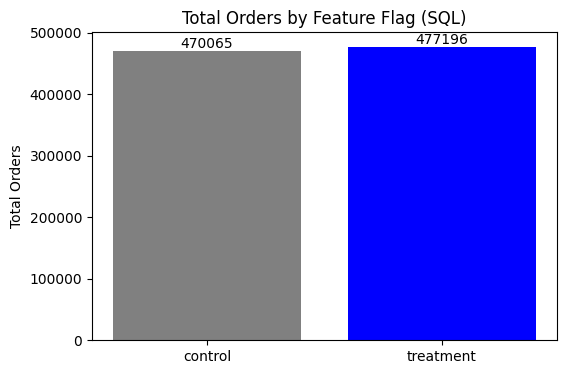

In [32]:
import matplotlib.pyplot as plt

# Plot for Average Days Between Orders
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.bar(experiment_summary['feature_flag'], experiment_summary['avg_days_between_orders'], color=['gray','green'])
ax1.set_title('Average Days Between Orders by Feature Flag (SQL)')
ax1.set_ylabel('Avg Days Between Orders')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f') # Format for float with 2 decimal places
plt.show()

# Plot for Total Orders
fig2, ax2 = plt.subplots(figsize=(6,4))
ax2.bar(experiment_summary['feature_flag'], experiment_summary['total_orders'], color=['gray','blue'])
ax2.set_title('Total Orders by Feature Flag (SQL)')
ax2.set_ylabel('Total Orders')
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f') # Format for integer
plt.show()

In [33]:
# Get unique users again (just to be safe)
users = con.execute("SELECT DISTINCT user_id FROM orders").df()

np.random.seed(42)

# Randomly assign first feature flag: recommendation engine
users['feature_flag_reco'] = np.random.choice(['control', 'treatment'], size=len(users))

# Randomly assign second feature flag: loyalty discount
users['feature_flag_loyalty'] = np.random.choice(['control', 'treatment'], size=len(users))

# Register the new table in DuckDB
con.register('user_flags_multi', users)


In [34]:
con.execute("""
CREATE TABLE orders_flagged_multi AS
SELECT o.*, u.feature_flag_reco, u.feature_flag_loyalty
FROM orders o
LEFT JOIN user_flags_multi u
ON o.user_id = u.user_id
""")


In [35]:
query_multi_flag = """
SELECT feature_flag_reco,
       feature_flag_loyalty,
       AVG(days_since_prior_order) AS avg_days_between_orders,
       COUNT(*) AS total_orders,
       COUNT(DISTINCT user_id) AS unique_users
FROM orders_flagged_multi
WHERE days_since_prior_order IS NOT NULL
GROUP BY feature_flag_reco, feature_flag_loyalty
ORDER BY feature_flag_reco, feature_flag_loyalty
"""
multi_flag_summary = con.execute(query_multi_flag).df()
multi_flag_summary


,feature_flag_reco,feature_flag_loyalty,avg_days_between_orders,total_orders,unique_users
0,control,control,11.020690,237799,15034
1,control,treatment,11.108611,237978,15313
2,treatment,control,11.083949,235666,15013
3,treatment,treatment,11.170967,235818,15200


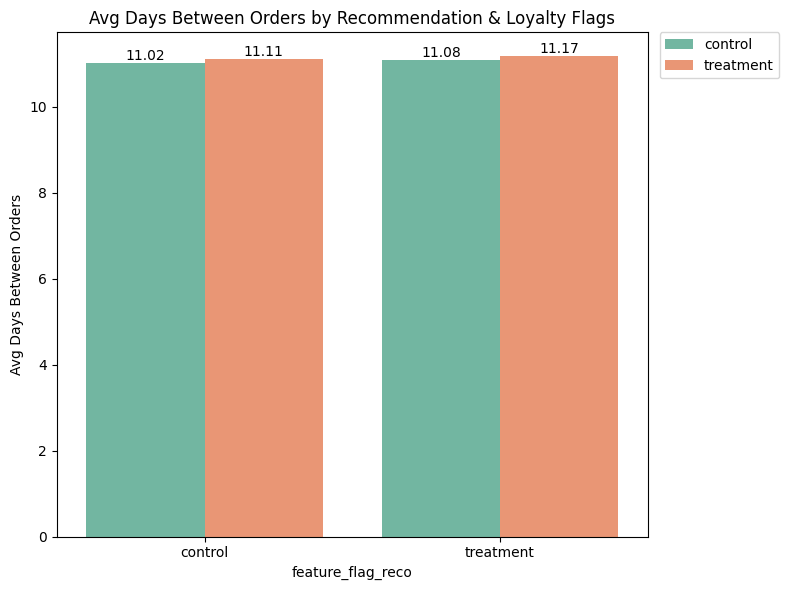

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
ax = sns.barplot(data=multi_flag_summary, x='feature_flag_reco', y='avg_days_between_orders', hue='feature_flag_loyalty', palette='Set2')
plt.title('Avg Days Between Orders by Recommendation & Loyalty Flags')
plt.ylabel('Avg Days Between Orders')

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Move the legend outside the plot area
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout() # Adjust plot to prevent labels/legend from being cut off
plt.show()